# Project: Does gender and age have any bearing on patients' tendency to show up or not show up at doctor's office, as promised?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### For this project, I have chosen "No-show appointment" dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. My goal is to investigate whether patients' gender or age has any significant impact on whether they keep the promise (show up at doctor's office as scheduled) or not.

> First things first, I am going import all the packages that I need for this project. I will obvious need pandas and numpy, but I would also have to use matplotlib and seaborn for visualization

In [217]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> I am just going to upload our csv file and see what they all look like: 

In [218]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> I am going to first look at the data type and the number of null values to get a general sense of the data, but it looks like I don't have any null values, and everything looks pretty good.

In [219]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> However, **PatientId** column looks like scientific number, and I would like to covert them into more readable format. I also would like to convert **ScheduleDay** and **AppointmentDay** columns into pandas datetime format. Why do I want to do this? Check out the next line. 

In [220]:
df['PatientId'] = df['PatientId'].astype('int')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

> The reason why we need readable dates is to extract day of week from our dates (such as Sunday, Monday... ) so that we can visualize which day of week patients tend to schedule their appointments, which is why I am creating **ScheduledDayWeek** column. This will be explained in the Exploratory Data Analysis section. 

In [221]:
df['ScheduledDayWeek'] = df['ScheduledDay'].dt.weekday_name
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do female patients tend to cancel medical appointments more than male patients? Does gender have any bearing on patient's likelihood of not showing up for appointment?

> Before we look further, let's just look at the gender ratio of our patients. Since we have nearly twice more female patients than males, any findings that break this trend would be considered as pretty interesting. Let's see if this holds true.

In [243]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

> First of all, I am going to break this dataset into one group of patients who did not show up and another one who did. 

In [234]:
# Dividing dataset into patients who showed up as promised and those who did NOT. 
no_show = df[df['No-show'] == 'Yes']
yes_show = df[df['No-show'] == 'No']

In [9]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleHour,ScheduledDayWeek
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Wednesday
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Wednesday
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,8,Tuesday
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,9,Thursday
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,7,Wednesday


> Now, let's see the gender ration of patients who did NOT show up. Female to male gender ration is nearly 2:1, which is no suprise since we have twice more female patients than male ones.

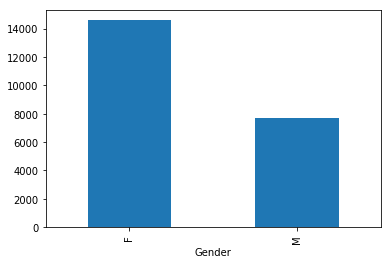

In [232]:
no_show.groupby('Gender').size().plot(kind='bar')

> What about the ones who DID make into doctor's office? Once again, we have 2:1 gender ration here again. This isn't all that interesting.

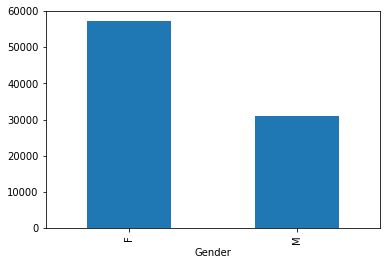

In [233]:
yes_show.groupby('Gender').size().plot(kind='bar')

> Now, I am going take a slightly different angle here and try to find out how males and females behaved differently in terms of scheduling their appointments. In other words, I wanted to ask if males tend to schedule their appointments on particular day of week (i.e. did more male patients tend to schedule their appointment on Mondays than female patients?). 


> So, the first thing I will do how male and female patients who **DID NOT SHOW UP** scheduled their appointments on each working day of week. 

In [244]:
ns = no_show.groupby(['ScheduledDayWeek', 'Gender']).size()
ns

ScheduledDayWeek  Gender
Friday            F         2442
                  M         1445
Monday            F         3048
                  M         1513
Saturday          M            1
Thursday          F         2407
                  M         1293
Tuesday           F         3453
                  M         1838
Wednesday         F         3244
                  M         1635
dtype: int64

> Since I wanted to plot this table with Seaborn, I needed to turn it into a dataframe.

In [260]:
df_ns = pd.DataFrame(ns)
df_ns.columns = ['value']
df_ns = df_ns.reset_index()

> Now let's plot this table. It is a bit disappointng, but for each day of week, we have nearly twice as many female patients as male ones. 

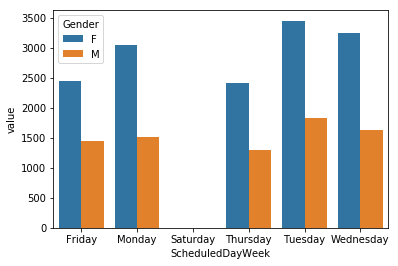

In [261]:
sns.barplot(x='ScheduledDayWeek', y='value', hue='Gender', data=df_ns)

Now I am going to plot the same with those who **DID SHOW UP**. We are seeing the same pattern, with nearly twice as many female patients on each weekday.  

In [25]:
ys = yes_show.groupby(['ScheduledDayWeek', 'Gender']).size()
df_ys = pd.DataFrame(ys)
df_ys.columns = ['value']
df_ys=df_ys.reset_index()

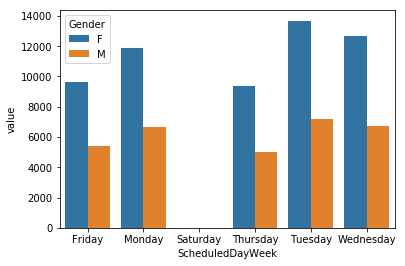

In [26]:
sns.barplot(x='ScheduledDayWeek', y='value', hue='Gender', data=df_ys)

### Research Question 2: Are older or younger people more likely not to show up at doctor's office? Does age play any role in terms of patients breaking promise and not showing up at doctor's office?

> Let's first look at how patients' ages are distributed. It seems as if we have a lot of people between 0 and 60, and there are definitely fewer patients who are 70 years and older.

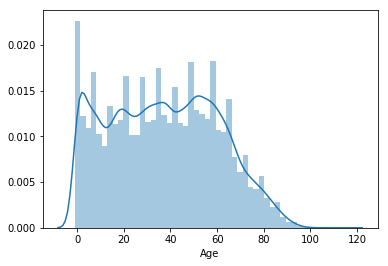

In [262]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

sns.distplot(df['Age'])

> Let's now look at the patients who DID NOT show up. It's somewhat similar to the entire patient population plotted above. However, there is a bit downward slope going from 20-year olds and elderly folks. I have no way of confirming this statistically, but perhaps there is a higher proportion of young people not showing up.

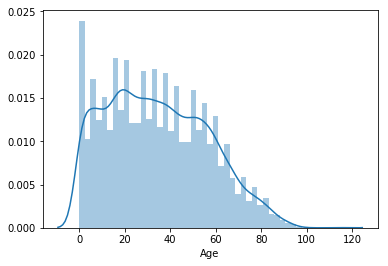

In [263]:
sns.distplot(no_show['Age'])

> On the contrarly, among those who DID show up, we are seeing a slightly upward slope between age 20-60. Maybe older people are more responsible and more likely to keep their promise? Once again, I cannot confirm this statistically, but the graph does show there is a higher proportion of older people (40-60) than those in their 20s.

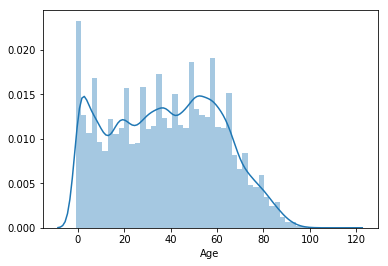

In [264]:
sns.distplot(yes_show['Age'])

<a id='conclusions'></a>
## Conclusions

#### So my conclusion is that gender does not seem to play much role in determining whether a patient is likely to keep promise and show up at doctor's office. Among those who DID NOT show up at doctor's office, I observed a higher proportion of younger people (20-40) than older folks (40-60). I need to emphasize that I have no way of knowing whether these differences are statistically significant.

#### These observations made me wonder if there is any way to extract particular variables (columns) that heavily impact the likelihood of a patient showing up or not showing up at doctor's office. So here's I am going to experiment with feature selection codes that I came across from the following site -- 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

> First, I am going to take a look at my dataset. 

In [265]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayWeek
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


> And then, I am going to "hot-encode", that is, turn categorical variables into numerical codes. 

In [266]:
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
weekday_dummies = pd.get_dummies(df['ScheduledDayWeek'])

> Once I am done, I am going to newly coded columns into our existing dataframe

In [197]:
df_complete = pd.concat([df, gender_dummies], axis=1)
df_complete = pd.concat([df, weekday_dummies], axis=1)

> Now that we have hot-encoded columns, I am going to ditch our old columns and other variables that we don't need for analysis

In [198]:
df_complete = df_complete.drop(columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'Gender', 'AppointmentDay', 'ScheduledDayWeek', 'Neighbourhood'])

In [199]:
df_complete.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,62,0,1,0,0,0,0,No,1,0,0,0,0,0
1,56,0,0,0,0,0,0,No,1,0,0,0,0,0
2,62,0,0,0,0,0,0,No,1,0,0,0,0,0
3,8,0,0,0,0,0,0,No,1,0,0,0,0,0
4,56,0,1,1,0,0,0,No,1,0,0,0,0,0


> Finally, I am going to turn our "No-show" variable into numerical codes instead of "Yes" and "No"

In [200]:
df_complete['No-show'] = pd.Categorical(df_complete['No-show'])
df_complete['ns_code'] = df_complete['No-show'].cat.codes
df_complete.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,ns_code
0,62,0,1,0,0,0,0,No,1,0,0,0,0,0,0
1,56,0,0,0,0,0,0,No,1,0,0,0,0,0,0
2,62,0,0,0,0,0,0,No,1,0,0,0,0,0,0
3,8,0,0,0,0,0,0,No,1,0,0,0,0,0,0
4,56,0,1,1,0,0,0,No,1,0,0,0,0,0,0


> Yup, time to ditch our old "No-show" column now that we have hot-encoded columns for No-show.

In [201]:
df_complete = df_complete.drop(columns=['No-show'])
df_complete.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,ns_code
0,62,0,1,0,0,0,0,1,0,0,0,0,0,0
1,56,0,0,0,0,0,0,1,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,0,0,0,0


> I have noticed that some ages were negative numbers and need to be ditched.

In [202]:
df_complete = df_complete[df_complete.Age > 0]

> Let machine learning code do all that work -- partitioning the dataset into independent variables and response variable and feed them into 
a machine learning model. These lines of code is aimed at generating to 10 features impacting the no-shows.

In [271]:
## Modified code from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_complete.iloc[:,0:12]
y = df_complete.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

           Specs        Score
0            Age  6331.049297
6   SMS_received  1172.438329
2   Hipertension   118.391092
1    Scholarship    82.962368
3       Diabetes    25.127783
5        Handcap     5.119741
9       Saturday     3.364135
8         Monday     2.312038
7         Friday     1.778601
10      Thursday     0.529661


In [269]:
features_df = pd.DataFrame(featureScores.nlargest(10,'Score'))

> Now, we need to convert the table above into a dataframe and plot it. It looks as if Age is the most important feature for this model.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

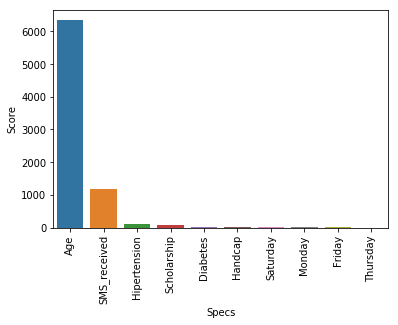

In [270]:
g = sns.barplot(x='Specs', y='Score', data=features_df)
plt.xticks(rotation=90)